<a href="https://colab.research.google.com/github/lnsayer/personal_repo/blob/main/drug%20discovery%20with%20BACE%20dataset/bace_dataset_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualisations of Molecules and graphs

In [14]:
# Time how long it takes to install important packages

from timeit import default_timer as timer
from IPython.display import Javascript

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))


start_time = timer()
rd_kit_start_time = timer()
!pip install rdkit
rd_kit_end_time = timer()

torch_geometric_start_time = timer()
!pip install torch_geometric
torch_geometric_end_time = timer()

deep_chem_start_time = timer()
!pip install deepchem
deep_chem_end_time = timer()

networkx_start_time = timer()
!pip install networkx
networkx_end_time = timer()

end_time = timer()

print(f"Time for cell to run: {end_time-start_time:.4f}")
print(f"rd_kit time: {rd_kit_end_time-rd_kit_start_time:.4f}")
print(f"torch_geometric time: {torch_geometric_end_time-torch_geometric_start_time:.4f}")
print(f"deep_chem time: {deep_chem_end_time-deep_chem_start_time:.4f}")
print(f"networkx time: {networkx_end_time-networkx_start_time:.4f}")

<IPython.core.display.Javascript object>

Time for cell to run: 30.5113
rd_kit time: 8.3554
torch_geometric time: 6.1402
deep_chem time: 8.9589
networkx time: 7.0560


In [2]:
# Import necessary modules

import requests
from pathlib import Path
import os.path as osp

import torch_geometric
import torch

from rdkit import Chem
from rdkit.Chem import Draw

import deepchem as dc
from deepchem.feat.graph_data import GraphData

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

import random

from timeit import default_timer as timer

from IPython.display import Javascript
import pickle

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [3]:
# Show directory structure of my google drive

import os
google_drive_path = Path("drive/MyDrive")
# Prints all subdirectories (takes ages)
for dirpath, dirnames, filenames in os.walk(google_drive_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")

There are 9 directories and 27 files in 'drive/MyDrive'.
There are 3 directories and 103 files in 'drive/MyDrive/Peru 2019 Expedition'.
There are 1 directories and 0 files in 'drive/MyDrive/Peru 2019 Expedition/Alex's Photos'.
There are 0 directories and 418 files in 'drive/MyDrive/Peru 2019 Expedition/Alex's Photos/Peru 2019'.
There are 0 directories and 0 files in 'drive/MyDrive/Peru 2019 Expedition/Emilie'.
There are 0 directories and 0 files in 'drive/MyDrive/Peru 2019 Expedition/Groña'.
There are 0 directories and 2 files in 'drive/MyDrive/Private'.
There are 0 directories and 50 files in 'drive/MyDrive/Old phone photos'.
There are 0 directories and 37 files in 'drive/MyDrive/Go_pro_gorge_du_verdon_2016'.
There are 0 directories and 37 files in 'drive/MyDrive/Colab Notebooks'.
There are 0 directories and 6 files in 'drive/MyDrive/udemy_ml_course_data'.
There are 3 directories and 0 files in 'drive/MyDrive/bace_graph_project'.
There are 2 directories and 0 files in 'drive/MyDrive/

In [7]:
# Check if Bace csv file has been downloaded, if not, download it. Data is saved temporarily in colab directory as
# it actually takes much longer to load from Google colab.

data_path = Path("data/")
bace_path = data_path / "raw"

if bace_path.is_dir():
  print(f"{bace_path} is already a directory")
else:
  print(f"{bace_path} is not a directory, creating one")
  bace_path.mkdir(parents=True, exist_ok=True)

  with open(bace_path / "bace.csv", "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/lnsayer/personal_repo/main/drug%20discovery%20with%20BACE%20dataset/data/bace.csv")
    print("Downloading data")
    f.write(request.content)

data/raw is not a directory, creating one


In [15]:
# Turn CSV file into a dataframe and resave it without unnecessary columns. This can be saved in the Google Drive.

bace_project_path = google_drive_path / "bace_graph_project"
bace_raw_path = bace_project_path / "data/raw"

bace_df = pd.read_csv(bace_raw_path/ "bace.csv")
bace_df = bace_df[["mol", "CID", "Class", "Model", "pIC50"]]
bace_df.to_csv(bace_raw_path/"bace.csv")

bace_df

,mol,CID,Class,Model,pIC50
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970
...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298


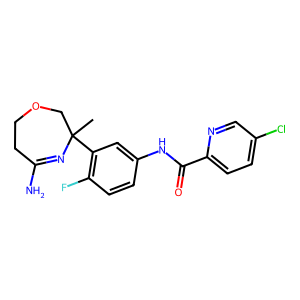

In [70]:
# Visualise one of the molecules from its SMILE input

# Pick first molecule in SMILES format
inhibitor = bace_df["mol"].sample().values[0]

# Turn into a Mol object, courtesy of rdkit
m = Chem.MolFromSmiles(inhibitor)

# Create a PIL image, containing a drawing of the molecule
img = Draw.MolToImage(m)

display(img)

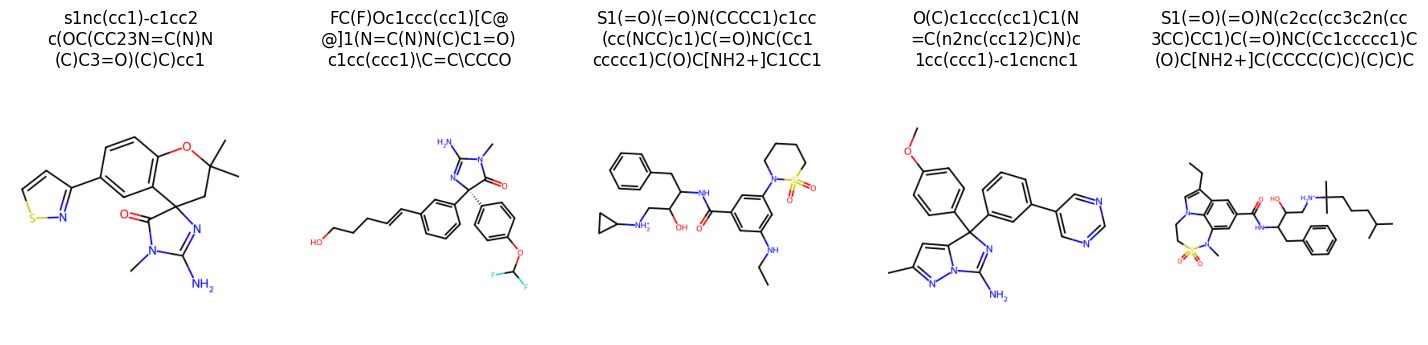

In [65]:
# Display five random molecules with their SMILES molecules

# Create axes and sample SMILES molecules
fig, ax = plt.subplots(ncols=5, nrows=1, figsize = (18,6))
mols = bace_df.sample(n=5, random_state=42)["mol"]

for i in range(len(mols)):

  # Convert each molecule to an image
  mol = mols.iloc[i]
  m = Chem.MolFromSmiles(mol)
  img = Draw.MolToImage(m)

  # Plot each molecule
  ax[i].imshow(img)
  ax[i].axis(False);

  # Divide the SMILE input into three parts
  first_part = mol[:int(len(mol)/3)]
  second_part = mol[int(len(mol)//3):int(2*len(mol)//3)]
  third_part = mol[int(2*len(mol)//3):]

  assert len(mol) == len(first_part)+len(second_part)+len(third_part)

  first_title = first_part + "\n"
  second_title = second_part + "\n"
  third_title = third_part + "\n"

  # Title each plot with its respective SMILE input
  ax[i].set_title(first_title+second_title+third_title)

In [85]:
# Test converting a molecule into a graph using MolGraphConvFeaturizer and to_pyg_graph

# Select random molecule
mol = bace_df["mol"].sample().values[0]

# Instantiate MolGraphConvFeaturizer class
featurizer=dc.feat.MolGraphConvFeaturizer(use_edges=True)

# Convert SMILES molecule into a DeepChem graph
out = featurizer.featurize(datapoints=mol)

# Convert into torch geometric graph
pyg_out = GraphData.to_pyg_graph(out[0])
pyg_out.y = torch.tensor([bace_df["Class"][0]])

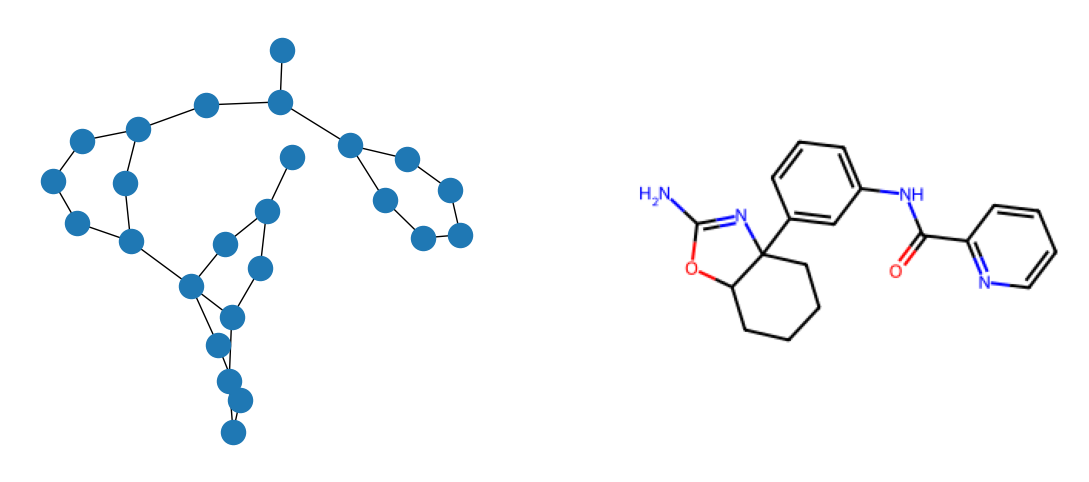

In [86]:
# Plot a graph representation of a molecule using NetworkX alongside a structural diagram of the same molecule

np.random.seed(44)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (14,6))

# Converting pyg_out to a networkx graph, which we can draw
g = torch_geometric.utils.to_networkx(pyg_out, to_undirected=True)
nx.draw(g, ax = ax[0])

# mol = pyg_out.smiles
m = Chem.MolFromSmiles(mol)
img = Draw.MolToImage(m)

ax[1].imshow(img)
ax[1].axis(False);